# Tarea de estudio de Random Forest 

El data set creditcard.csv fue descargado de Kaggle.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Creación del modelo

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

LABELS = ['Normal', 'Fraud']

def mostrar_resultado(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, cmap = 'Greens', annot=True, fmt = '2d')
    plt.title('Matriz de Confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()
    print('-'*110)
    print(classification_report(y_test, y_pred))
    print('-'*110)
    print(f'ROC_SCORE: {roc_auc_score(y_test,y_pred)}')

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis = 1)
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Para efectos de comparación primero se crea el model de regresión logística

In [13]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver='newton-cg',class_weight='balanced' )
modelLR.fit(X_train, Y_train)

c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaRandomForest\src\RFenv\Lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaRandomForest\src\RFenv\Lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
c:\Users\JGodoy\Documents\University Projects\Fundamentos de Machine Learning\TareaRandomForest\src\RFenv\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.13382934520628578. Increase the number of iterations.
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

Elaboración del modelo de Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

## Evalución del Modelo

Regresión Logística

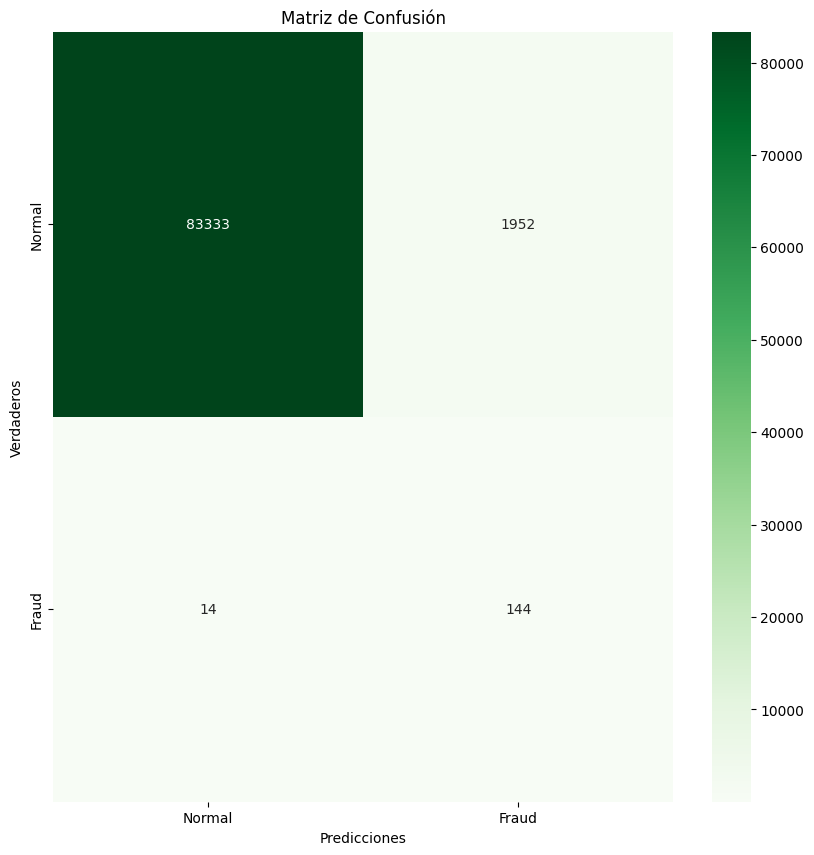

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85285
           1       0.07      0.91      0.13       158

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.9442522205887482


In [14]:
Y_predLr = modelLR.predict(X_test)
mostrar_resultado(Y_test,Y_predLr)

Random Forest

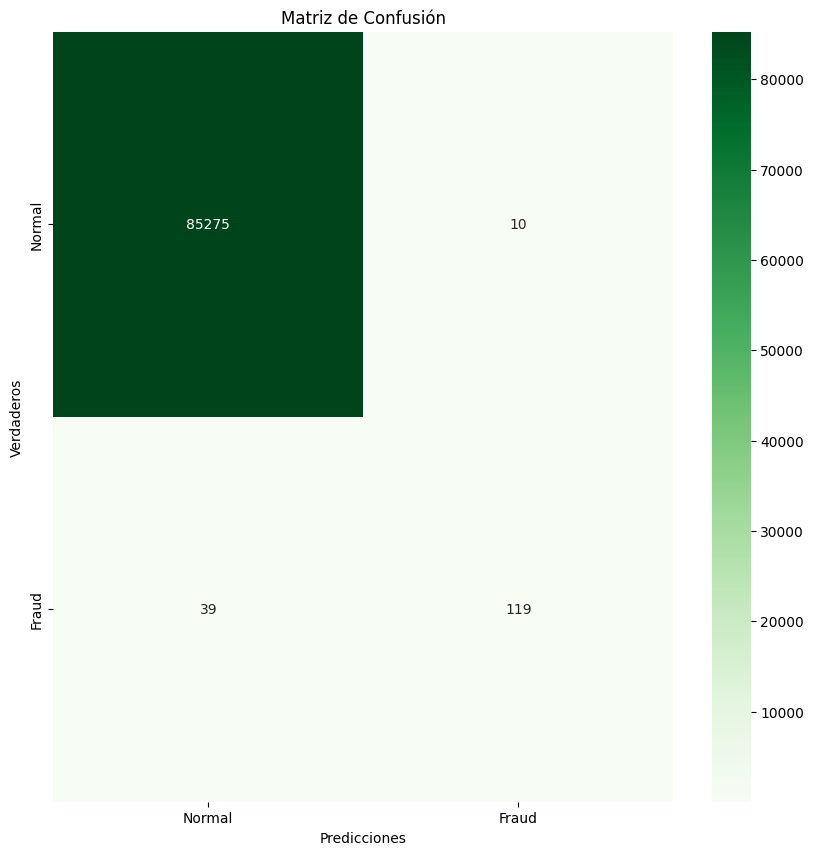

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.92      0.75      0.83       158

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.876523651524338


In [17]:
Y_predRf = modelRF.predict(X_test)
mostrar_resultado(Y_test, Y_predRf)

## Análisis del Bosque

se compara la eficiencia del arbo de decision, esta ves con distintos niveles de profundidad

max_depth = 3

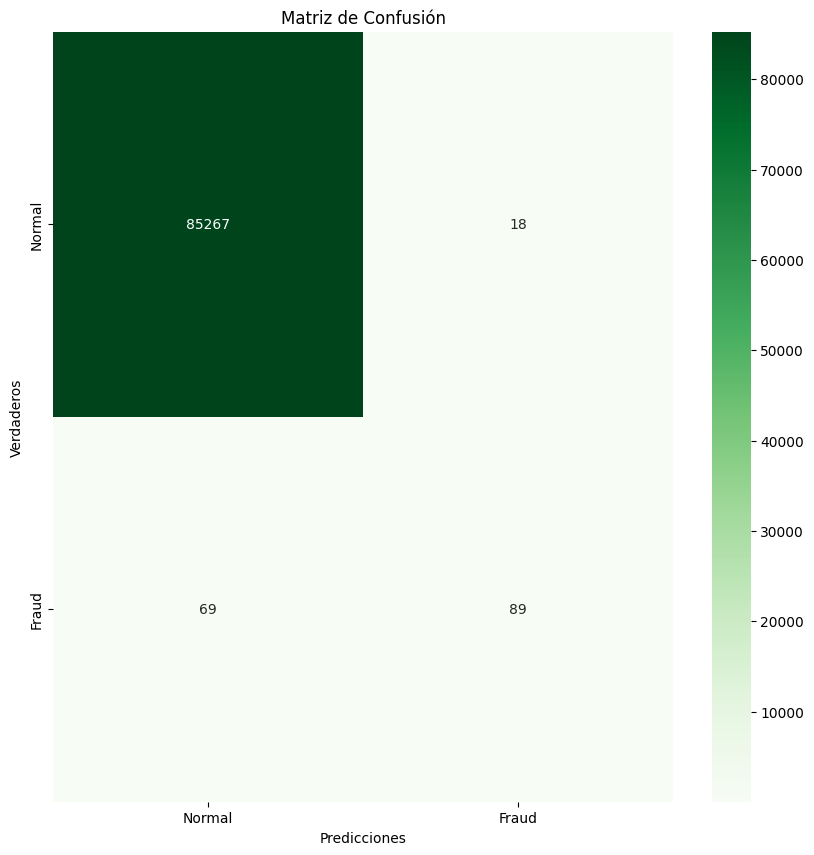

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.83      0.56      0.67       158

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.7815400410982387


In [23]:
model_md_3 = RandomForestClassifier(n_estimators=100, max_depth=3, bootstrap=True, max_features='sqrt')
model_md_3.fit(X_train, Y_train)
Y_pred_md_3 = model_md_3.predict(X_test)

mostrar_resultado(Y_test, Y_pred_md_3)

max_depth = 5

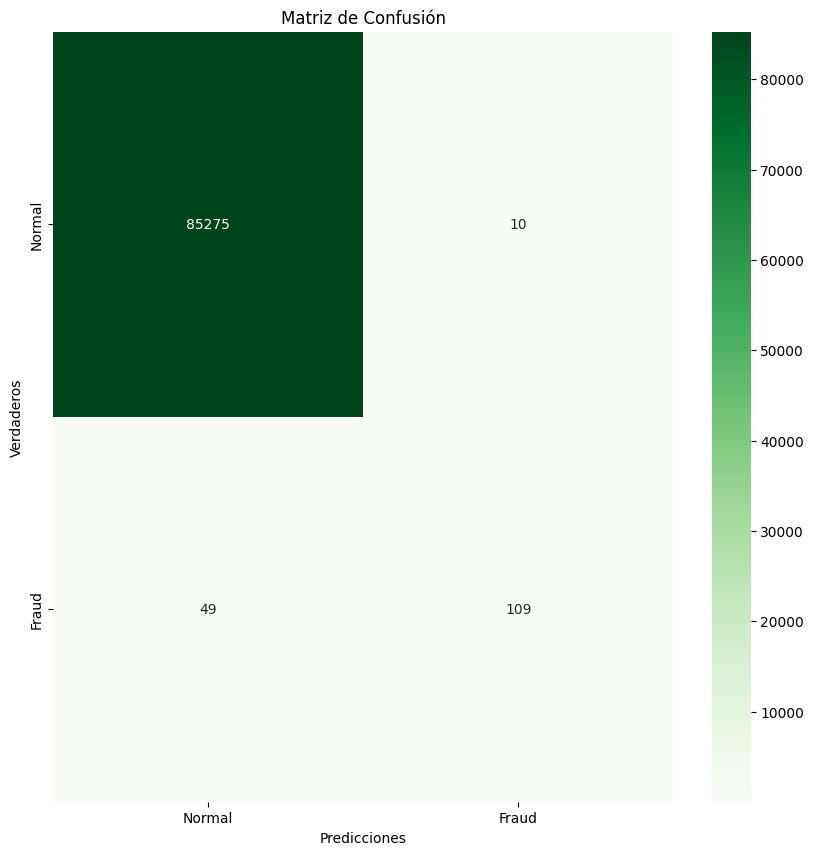

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.92      0.69      0.79       158

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.8448780819040849


In [24]:
model_md_5 = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, max_features='sqrt')
model_md_5.fit(X_train, Y_train)
Y_pred_md_5 = model_md_5.predict(X_test)

mostrar_resultado(Y_test, Y_pred_md_5)

max_depth = 7

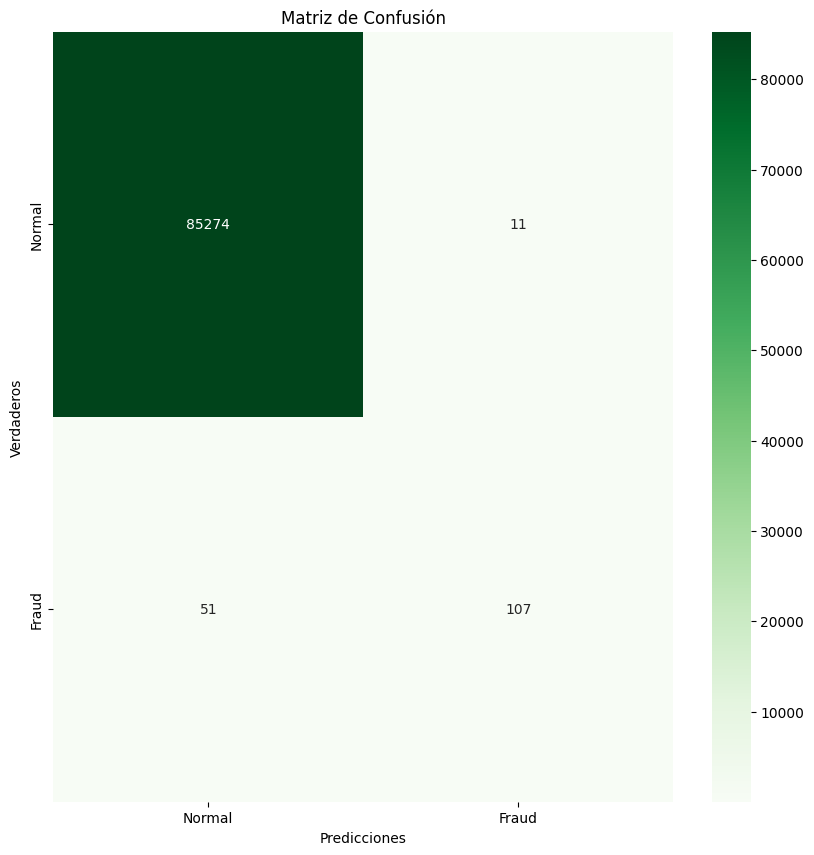

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.91      0.68      0.78       158

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.8385431052843667


In [25]:
model_md_7 = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, max_features='sqrt')
model_md_7.fit(X_train, Y_train)
Y_pred_md_7 = model_md_7.predict(X_test)

mostrar_resultado(Y_test, Y_pred_md_7)

Buscando los mejores hyperparametros para el modelo de Random Forest

In [31]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': range(90,100),
    'max_depth': range(1,10)
}

best_model = RandomForestClassifier()

random_search = RandomizedSearchCV(best_model, param_distributions=params, n_iter=5, cv = 5)

random_search.fit(X_train, Y_train)

print(f'Best hyperparamenters: {random_search.best_params_}')

Best hyperparamenters: {'n_estimators': 96, 'max_depth': 6}


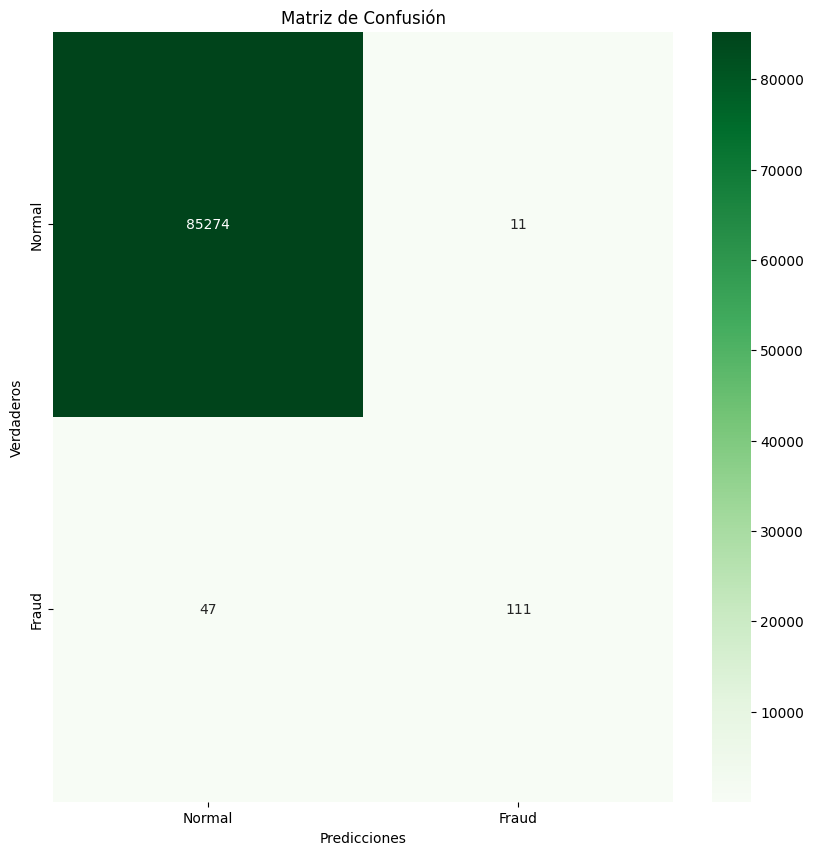

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.91      0.70      0.79       158

    accuracy                           1.00     85443
   macro avg       0.95      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

--------------------------------------------------------------------------------------------------------------
ROC_SCORE: 0.851201333132468


In [32]:
model_best_params = RandomForestClassifier(n_estimators=96, max_depth=6, bootstrap=True, max_features='sqrt')
model_best_params.fit(X_train, Y_train)
Y_pred_best_paras = model_best_params.predict(X_test)

mostrar_resultado(Y_test, Y_pred_best_paras)